# Machine Learning using Scikit Learn

There are two kinds of machine learning we will talk about today: *supervised* learning and *unsupervised* learning. 

supervised: classification, regression,...

unsupervised: clustering, dimension reduction,...

## sklearn estimator API

Scikit-learn strives to have a uniform interface across all objects. Given a scikit-learn *estimator* named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, ``fit`` takes only a single argument,
    the data `X` (e.g. `model.fit(X)`).
    
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : An indication of how well the model fits the training data.  Scores are between 0 and 1, with a larger score indicating a better fit.
  
## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of size `[n_samples, n_features]`. Many algorithms also accept ``scipy.sparse`` matrices of the same shape.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.
  
### Numerical vs Categorical

What if you have categorical features?  For example, imagine there is data on the color of each
iris:

    color in [red, blue, purple]

You might be tempted to assign numbers to these features, i.e. *red=1, blue=2, purple=3*
but in general **this is a bad idea**.  Estimators tend to operate under the assumption that
numerical features lie on some continuous scale, so, for example, 1 and 2 are more alike
than 1 and 3, and this is often not the case for categorical features.

A better strategy is to give each category its own dimension.  
The enriched iris feature set would hence be in this case:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- color=purple (1.0 or 0.0)
- color=blue (1.0 or 0.0)
- color=red (1.0 or 0.0)

Note that using many of these categorical features may result in data which is better
represented as a **sparse matrix**, as we'll see with the text classification example
below.

#### Using the DictVectorizer to encode categorical features

When the source data is encoded has a list of dicts where the values are either strings names for categories or numerical values, you can use the `DictVectorizer` class to compute the boolean expansion of the categorical features while leaving the numerical features unimpacted:

In [1]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
]

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
tf_measurements = vec.fit_transform(measurements)
tf_measurements.toarray()

array([[  1.,   0.,   0.,  33.],
       [  0.,   1.,   0.,  12.],
       [  0.,   0.,   1.,  18.]])

In [4]:
vec.get_feature_names()

['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']

# Clustering using K-Means

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
import sklearn.datasets
#load the iris datasets
data = sklearn.datasets.load_iris()
data.data.shape

(150, 4)

In [91]:
from sklearn.cluster import KMeans
iris_pred = KMeans(n_clusters=3, random_state = 102).fit_predict(data.data)

C:\Users\AK113797\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


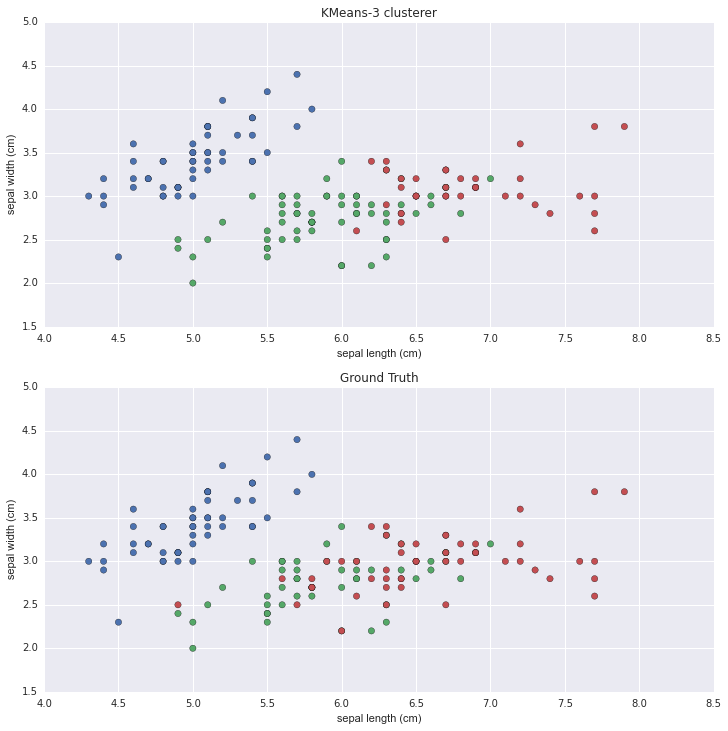

In [116]:
plt.figure(figsize=(12, 12))

colors = sns.color_palette()

plt.subplot(211)
plt.scatter(data.data[:, 0], data.data[:, 1], c=[colors[i] for i in iris_pred], s=40)
plt.title('KMeans-3 clusterer')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

plt.subplot(212)
plt.scatter(data.data[:, 0], data.data[:, 1], c=[colors[i] for i in data.target],s=40)
plt.title('Ground Truth')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

well not that great. Let's use a supervised classifier

First, split our data in train and test set

In [37]:

import sklearn.cross_validation

data_train, data_test, target_train, target_test = sklearn.cross_validation.train_test_split(
    data.data, data.target, test_size=0.20, random_state = 5)

print(data.data.shape, data_train.shape, data_test.shape)

(150, 4) (120, 4) (30, 4)


Now, we use a DecisionTree to learn a model and test our result

In [62]:
from sklearn.tree import DecisionTreeClassifier

instance = DecisionTreeClassifier()
r = instance.fit(data_train, target_train)
target_predict = instance.predict(data_test)

from sklearn.metrics import accuracy_score
print('Prediction accuracy: ',accuracy_score(target_predict, target_test))


Prediction accuracy:  0.933333333333


pretty good, isn't it.

C:\Users\AK113797\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


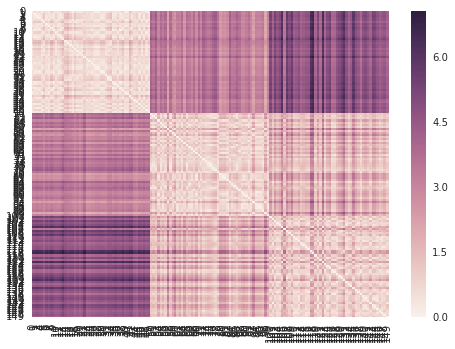

In [83]:
## Dimension Reduction
from sklearn.metrics import euclidean_distances

similarities = euclidean_distances(data.data)
#sns.heatmap(similarities)

C:\Users\AK113797\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\Users\AK113797\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


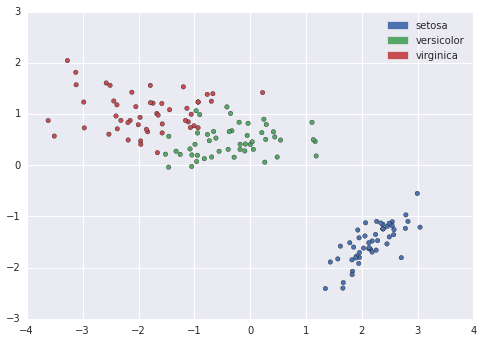

In [93]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, random_state=5, dissimilarity="precomputed")
pos = mds.fit(similarities).embedding_

plt.scatter(pos[:, 0], pos[:, 1], s=20, c=[colors[i] for i in data.target])

#create a legend since we just have one plot and not three fake the legend using patches
import matplotlib.patches as mpatches
patches = [ mpatches.Patch(color=colors[i], label=data.target_names[i]) for i in range(3) ]
plt.legend(handles=patches)
plt.legend()

## TASK

> create an interactive plot where the user can select the number of clusters and show the clustering result in an MDS plot of Iris

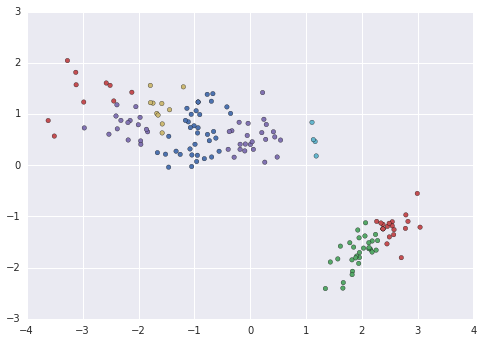

In [115]:
from IPython.html.widgets import interact
colors = sns.color_palette(n_colors=10)

@interact(n_clusters=(1,10))
def draw_plot(n_clusters):
    instance = KMeans(n_clusters=n_clusters, random_state = 102)
    clusters_assignment = instance.fit_predict(data.data)
    plt.scatter(pos[:, 0], pos[:, 1], s=20, c=[colors[i] for i in clusters_assignment])